### Grey Scale로 clustering하기 - Upper_Body

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

### Dataset에서 img_list에 image file 이름을 저장

In [3]:
dataset_path = "C:/reClos/dataset/DressCode/cloth/upper_body/"

img_list = []
for img in os.listdir(dataset_path):
    if img.endswith("1.jpg"):
        img_list.append(img)

print(img_list)

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'C:/reClos/dataset/DressCode/cloth/upper_body/'

In [74]:
print(len(img_list))

15363


### Feature 뽑는 모델 

In [4]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class CustomImageDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        self.images = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.directory, self.images[idx])
        # image = Image.open(img_name).convert('RGB')
        image = Image.open(img_name).convert('L') # load image grey scale
        if self.transform:
            image = self.transform(image)
        return image

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3), # convert to 3 channels
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = CustomImageDataset(directory=dataset_path, transform=transform)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

In [5]:
import torch
from torchvision.models import resnet50

# Initialize the pre-trained model
model = resnet50(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Adapt the model to use it as a feature extractor
model = torch.nn.Sequential(*(list(model.children())[:-1]))

if torch.cuda.is_available():
    device = torch.device("cuda")
    print('device: cuda')
else:
    device = torch.device("cpu")
    print('device: cpu')
model = model.to(device)

# Feature extraction function
def extract_features(dataloader, model, device):
    features = []
    with torch.no_grad():
        for inputs in dataloader:
            inputs = inputs.to(device)  # Move input data to the GPU
            outputs = model(inputs).flatten(start_dim=1)
            features.append(outputs.cpu().numpy())  # Move the tensors back to CPU for numpy conversion
    return np.concatenate(features, axis=0)

# Extract features
features_u = extract_features(dataloader, model, device)

c:\Users\reclos\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\reclos\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


device: cuda


In [6]:
features_u.shape

(15363, 2048)

### save model

In [7]:
np.save('./features_grey_upper.npy', features_u)

### load model

In [75]:
features_u = np.load('./features_grey_upper.npy')

### Clustering Model - KMeans

In [76]:
from sklearn.cluster import KMeans

# Clustering
kmeans_u = KMeans(n_clusters=100, random_state=22) # 100개의 cluster로 나누기
clusters_u = kmeans_u.fit_predict(features_u) # 각 이미지가 어떤 cluster에 속하는지

c:\Users\reclos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [77]:
print(len(clusters_u))
print(clusters_u)
print(len(set(clusters_u)))

15363
[40 88  3 ... 24 75 46]
100


In [78]:
cluster_groups_u = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
for i, cluster in enumerate(clusters_u):
    # print(i, cluster)
    if cluster not in cluster_groups_u:
        cluster_groups_u[cluster] = []
    
    cluster_groups_u[cluster].append(img_list[i])

In [ ]:
cluster_groups_u = 

In [79]:
def print_cluster_img(num):
    for i in range(15):
        img = plt.imread(dataset_path + cluster_groups_u[num][i])
        plt.subplot(3, 5, i+1)
        plt.axis('off')
        plt.imshow(img)

### Cluster 결과 plot

C:\Users\reclos\AppData\Local\Temp\ipykernel_1260\2143299729.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, i+1)


C:\Users\reclos\AppData\Local\Temp\ipykernel_1260\1804572213.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


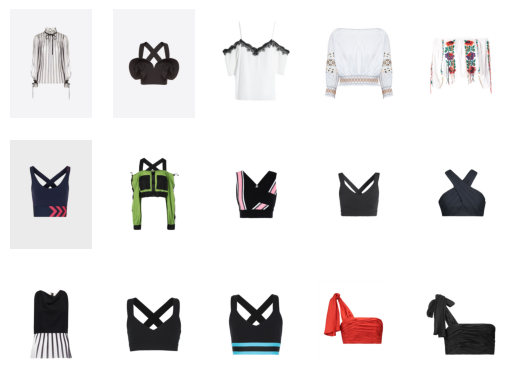

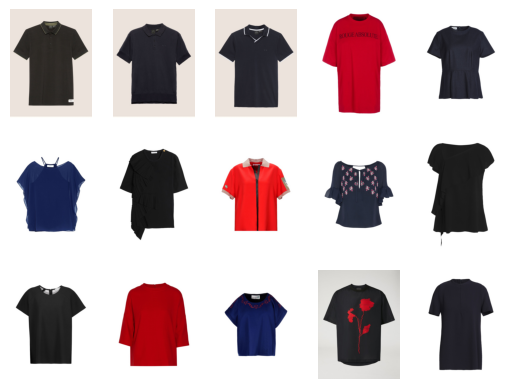

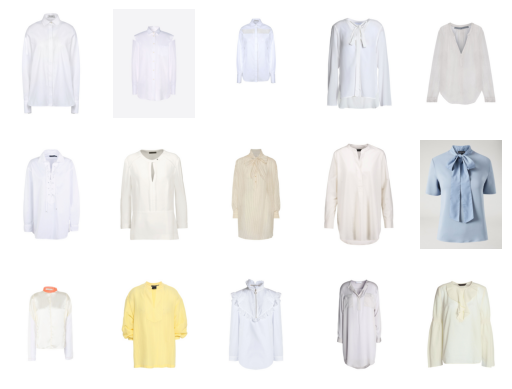

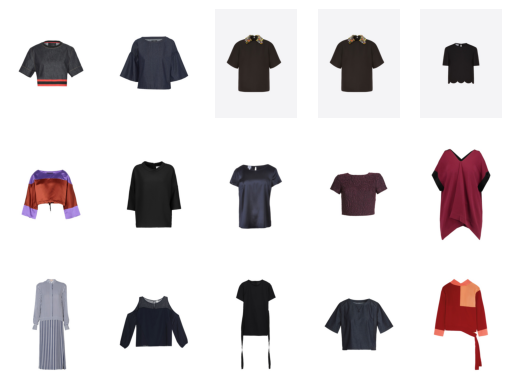

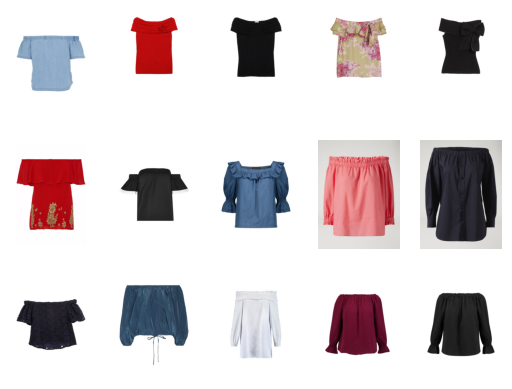

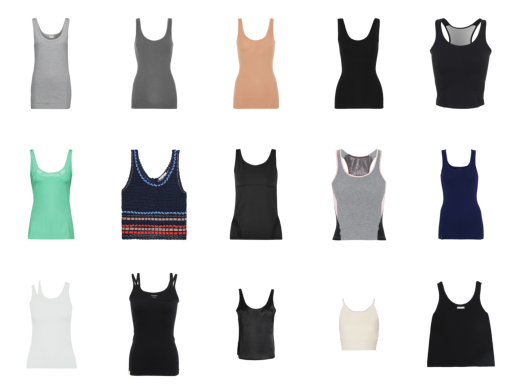

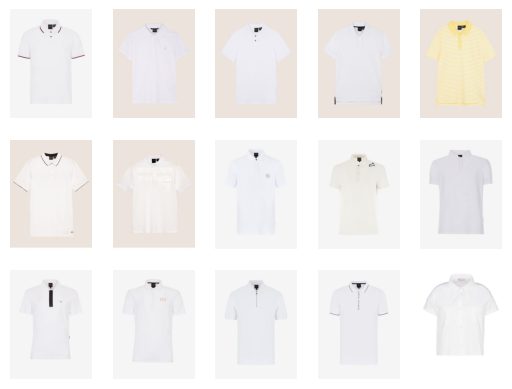

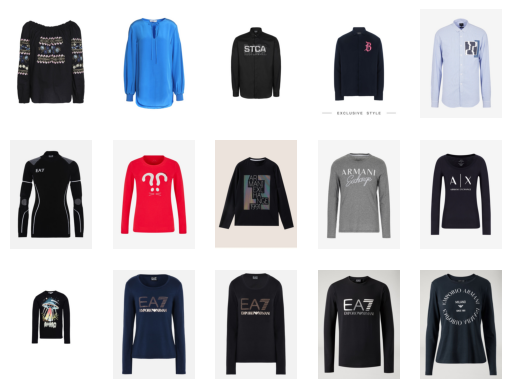

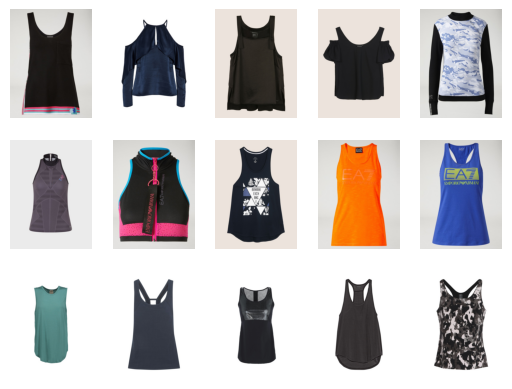

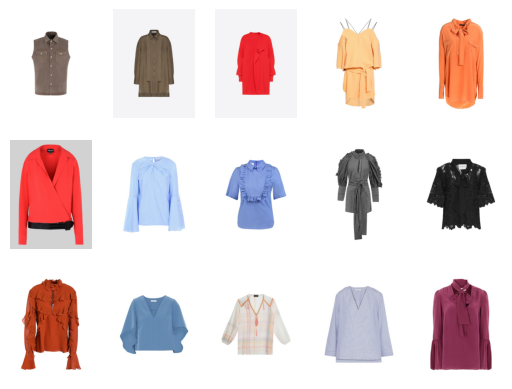

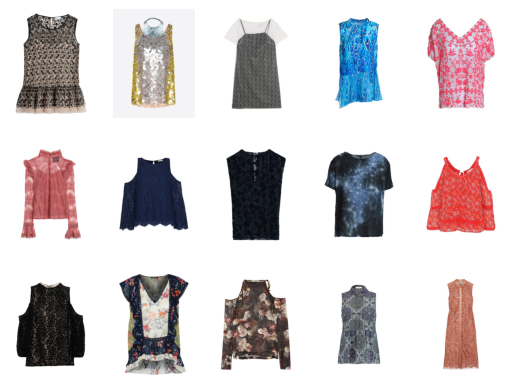

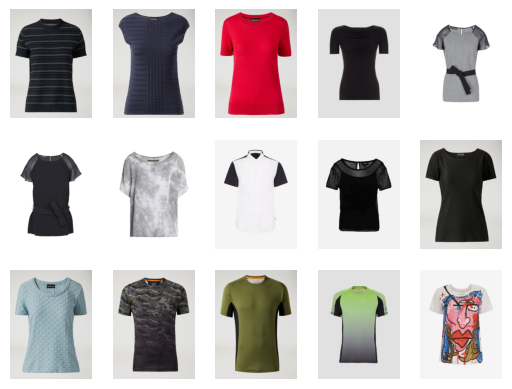

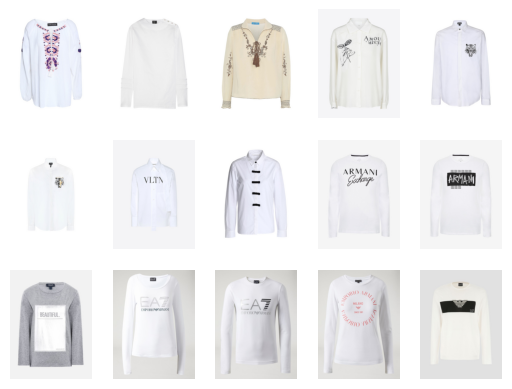

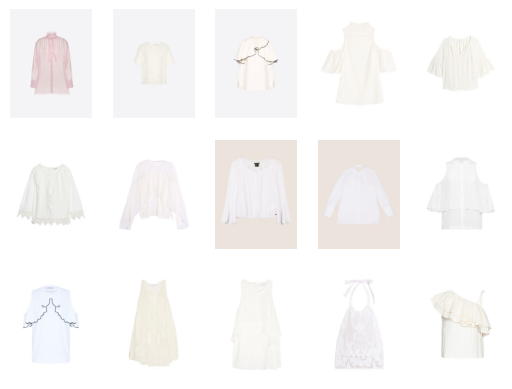

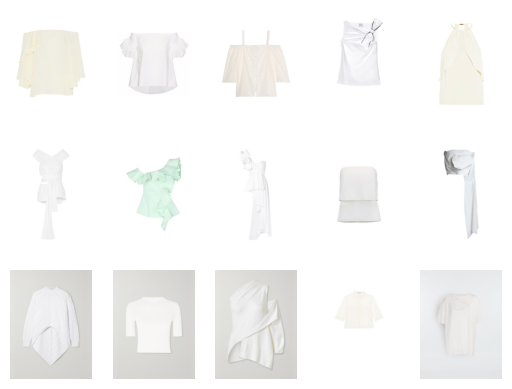

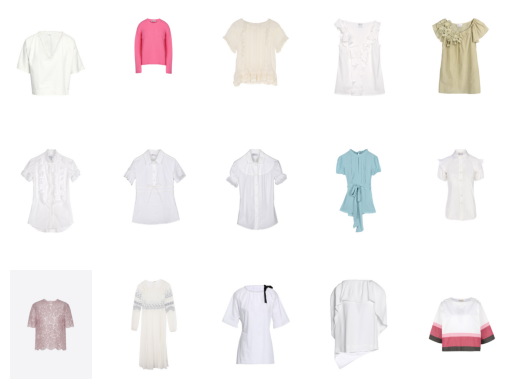

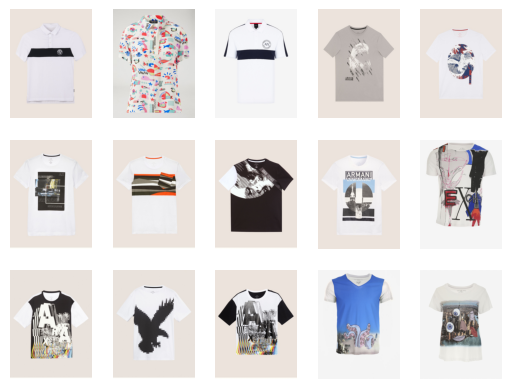

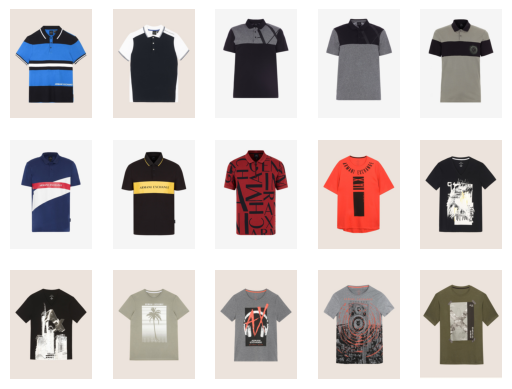

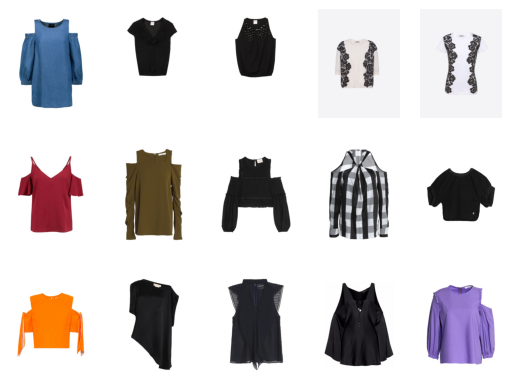

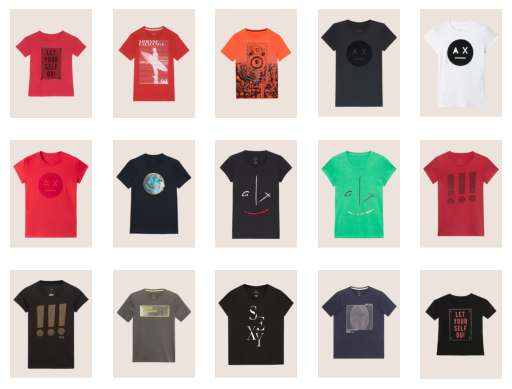

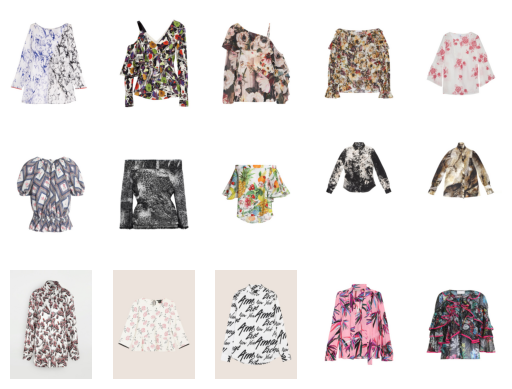

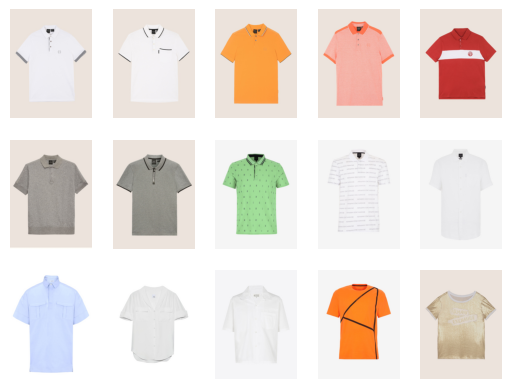

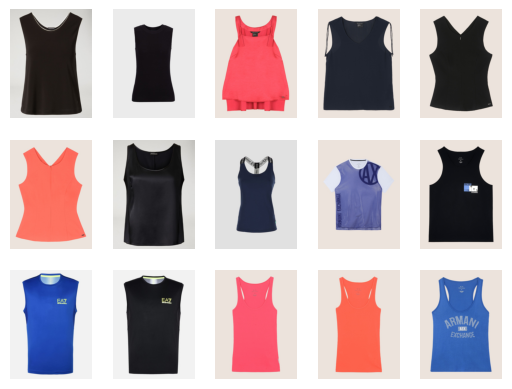

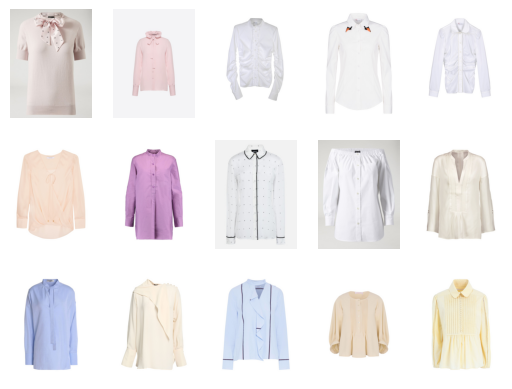

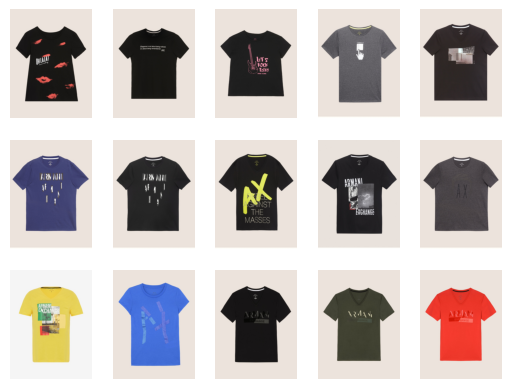

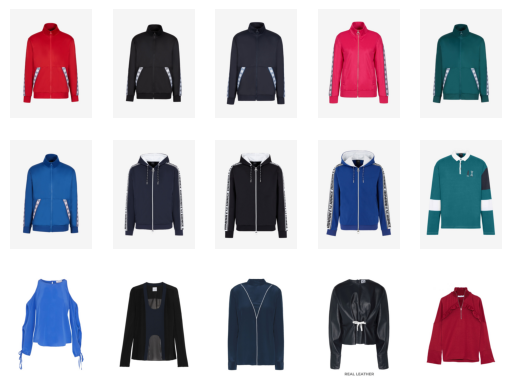

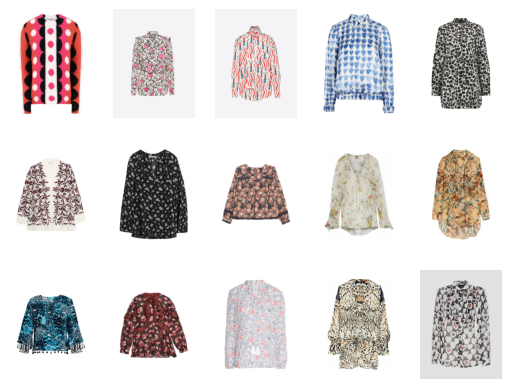

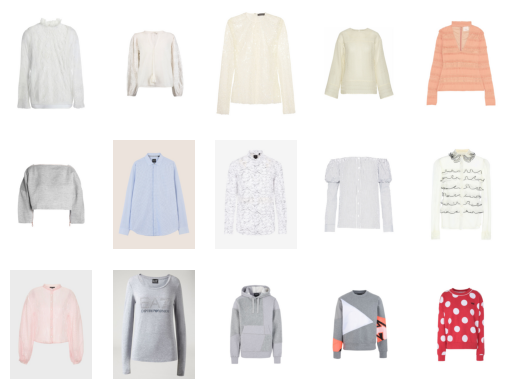

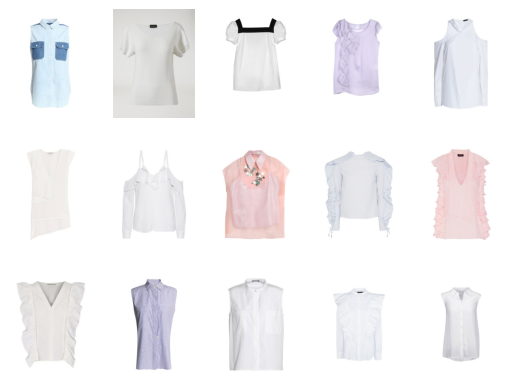

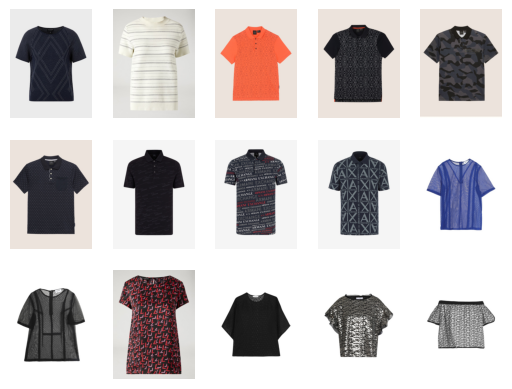

In [84]:
for i in range(30):
    plt.figure()
    plt.axis('off')
    plt.title(f'image cluster {i}')
    print_cluster_img(i)

In [85]:
cluster_groups_u[5]

['007204_1.jpg',
 '007210_1.jpg',
 '007211_1.jpg',
 '007212_1.jpg',
 '007219_1.jpg',
 '007225_1.jpg',
 '007248_1.jpg',
 '007269_1.jpg',
 '007283_1.jpg',
 '007287_1.jpg',
 '007288_1.jpg',
 '007313_1.jpg',
 '007345_1.jpg',
 '007359_1.jpg',
 '007373_1.jpg',
 '007376_1.jpg',
 '007395_1.jpg',
 '007509_1.jpg',
 '007535_1.jpg',
 '007536_1.jpg',
 '007584_1.jpg',
 '007595_1.jpg',
 '007610_1.jpg',
 '007615_1.jpg',
 '007729_1.jpg',
 '007801_1.jpg',
 '007857_1.jpg',
 '007864_1.jpg',
 '007897_1.jpg',
 '007959_1.jpg',
 '007964_1.jpg',
 '008024_1.jpg',
 '008040_1.jpg',
 '008046_1.jpg',
 '008062_1.jpg',
 '008165_1.jpg',
 '008235_1.jpg',
 '008790_1.jpg',
 '009855_1.jpg',
 '010387_1.jpg',
 '010446_1.jpg',
 '010450_1.jpg',
 '010451_1.jpg',
 '010501_1.jpg',
 '010757_1.jpg',
 '010983_1.jpg',
 '010984_1.jpg',
 '011026_1.jpg',
 '011073_1.jpg',
 '011231_1.jpg',
 '011289_1.jpg',
 '011307_1.jpg',
 '011405_1.jpg',
 '011474_1.jpg',
 '011478_1.jpg',
 '011578_1.jpg',
 '011611_1.jpg',
 '011629_1.jpg',
 '011719_1.jpg

### Predict

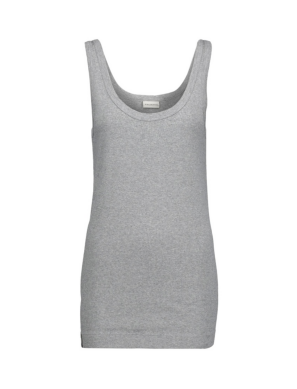

Test Image Cluster: [5]


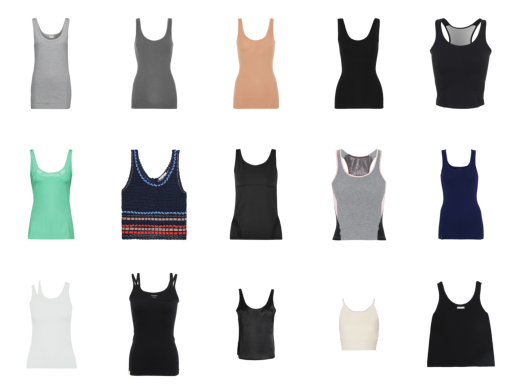

In [92]:
test_img = plt.imread('C:/reClos/dataset/DressCode/cloth/upper_body/007204_1.jpg')

test_img_transformed = transform(Image.fromarray(test_img))
test_img_feature = model(test_img_transformed.unsqueeze(0).to(device)).flatten(start_dim=1).detach().cpu().numpy()
# Plot the test image
plt.imshow(test_img)
plt.axis('off')
plt.show()

# Predict the cluster for the test image
test_cluster = kmeans_u.predict(test_img_feature) # predict the cluster number for the test image
print("Test Image Cluster:", test_cluster)

# Plot the images in the same cluster as the test image
print_cluster_img(test_cluster[0])


In [93]:
cluster_groups_u[test_cluster[0]]

['007204_1.jpg',
 '007210_1.jpg',
 '007211_1.jpg',
 '007212_1.jpg',
 '007219_1.jpg',
 '007225_1.jpg',
 '007248_1.jpg',
 '007269_1.jpg',
 '007283_1.jpg',
 '007287_1.jpg',
 '007288_1.jpg',
 '007313_1.jpg',
 '007345_1.jpg',
 '007359_1.jpg',
 '007373_1.jpg',
 '007376_1.jpg',
 '007395_1.jpg',
 '007509_1.jpg',
 '007535_1.jpg',
 '007536_1.jpg',
 '007584_1.jpg',
 '007595_1.jpg',
 '007610_1.jpg',
 '007615_1.jpg',
 '007729_1.jpg',
 '007801_1.jpg',
 '007857_1.jpg',
 '007864_1.jpg',
 '007897_1.jpg',
 '007959_1.jpg',
 '007964_1.jpg',
 '008024_1.jpg',
 '008040_1.jpg',
 '008046_1.jpg',
 '008062_1.jpg',
 '008165_1.jpg',
 '008235_1.jpg',
 '008790_1.jpg',
 '009855_1.jpg',
 '010387_1.jpg',
 '010446_1.jpg',
 '010450_1.jpg',
 '010451_1.jpg',
 '010501_1.jpg',
 '010757_1.jpg',
 '010983_1.jpg',
 '010984_1.jpg',
 '011026_1.jpg',
 '011073_1.jpg',
 '011231_1.jpg',
 '011289_1.jpg',
 '011307_1.jpg',
 '011405_1.jpg',
 '011474_1.jpg',
 '011478_1.jpg',
 '011578_1.jpg',
 '011611_1.jpg',
 '011629_1.jpg',
 '011719_1.jpg

### 예측 클러스터에 속하는 이미지들의 파일명을 저장하는 리스트 생성

In [94]:

test_cluster_img_list = cluster_groups_u[test_cluster[0]]

print("test image 클러스터에 속하는 이미지들의 파일명:", test_cluster_img_list)

test_cluster_img_idx_list = [i for i, j in enumerate(img_list) if j in test_cluster_img_list]
test_cluster_img_idx_list # idx list

test image 클러스터에 속하는 이미지들의 파일명: ['007204_1.jpg', '007210_1.jpg', '007211_1.jpg', '007212_1.jpg', '007219_1.jpg', '007225_1.jpg', '007248_1.jpg', '007269_1.jpg', '007283_1.jpg', '007287_1.jpg', '007288_1.jpg', '007313_1.jpg', '007345_1.jpg', '007359_1.jpg', '007373_1.jpg', '007376_1.jpg', '007395_1.jpg', '007509_1.jpg', '007535_1.jpg', '007536_1.jpg', '007584_1.jpg', '007595_1.jpg', '007610_1.jpg', '007615_1.jpg', '007729_1.jpg', '007801_1.jpg', '007857_1.jpg', '007864_1.jpg', '007897_1.jpg', '007959_1.jpg', '007964_1.jpg', '008024_1.jpg', '008040_1.jpg', '008046_1.jpg', '008062_1.jpg', '008165_1.jpg', '008235_1.jpg', '008790_1.jpg', '009855_1.jpg', '010387_1.jpg', '010446_1.jpg', '010450_1.jpg', '010451_1.jpg', '010501_1.jpg', '010757_1.jpg', '010983_1.jpg', '010984_1.jpg', '011026_1.jpg', '011073_1.jpg', '011231_1.jpg', '011289_1.jpg', '011307_1.jpg', '011405_1.jpg', '011474_1.jpg', '011478_1.jpg', '011578_1.jpg', '011611_1.jpg', '011629_1.jpg', '011719_1.jpg', '011757_1.jpg', '011814

[7204,
 7210,
 7211,
 7212,
 7219,
 7225,
 7248,
 7269,
 7283,
 7287,
 7288,
 7313,
 7345,
 7359,
 7373,
 7376,
 7395,
 7509,
 7535,
 7536,
 7584,
 7595,
 7610,
 7615,
 7729,
 7801,
 7857,
 7864,
 7897,
 7959,
 7964,
 8024,
 8040,
 8046,
 8062,
 8165,
 8235,
 8790,
 9855,
 10387,
 10446,
 10450,
 10451,
 10501,
 10757,
 10983,
 10984,
 11026,
 11073,
 11231,
 11289,
 11307,
 11405,
 11474,
 11478,
 11578,
 11611,
 11629,
 11719,
 11757,
 11814,
 11851,
 11856,
 12921,
 13064,
 13100,
 13181,
 13235,
 13666,
 13681,
 13872,
 13882,
 13905,
 13955,
 14447,
 14801,
 14898,
 14963]

### 유클리디안 거리로 유사도 계산

In [95]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

reference_feature = test_img_feature  # 기준 이미지의 특징 벡터
cluster_features_u = features_u[test_cluster_img_idx_list]    # test 클러스터 내 모든 이미지의 특징 벡터

# 유클리디안 거리 계산
distances = euclidean_distances(reference_feature, cluster_features_u)[0]
distances.shape

(78,)

### 유클리디안 거리가 가까운순으로 index 정렬

In [96]:
sorted_indices = np.argsort(distances)  # 오름차순으로 정렬
print(sorted_indices.shape)
sorted_indices

(78,)


array([ 0,  2,  1, 31, 76,  8, 62,  3, 21, 51, 49, 17, 75, 32, 23, 77, 39,
       28, 41, 37, 64,  7, 33, 45,  9, 52,  5, 42,  4, 53, 18, 26, 71, 46,
       19, 27, 25, 61, 66, 16, 11, 36, 13, 12, 65, 73, 72, 50, 14, 34, 35,
       63, 47, 54, 67, 22, 58, 55, 29, 59, 57, 10, 40, 69, 70, 30, 15, 56,
       48, 68, 43, 44, 24, 60, 20,  6, 38, 74], dtype=int64)

In [97]:
test_cluster_img_list = np.array(test_cluster_img_list)
test_cluster_img_list[sorted_indices]  # 거리가 가장 가까운 순서대로 test cluster 내 이미지 정렬한 이미지 리스트

array(['007204_1.jpg', '007211_1.jpg', '007210_1.jpg', '008024_1.jpg',
       '049727_1.jpg', '007283_1.jpg', '011856_1.jpg', '007212_1.jpg',
       '007595_1.jpg', '011307_1.jpg', '011231_1.jpg', '007509_1.jpg',
       '049630_1.jpg', '008040_1.jpg', '007615_1.jpg', '049792_1.jpg',
       '010387_1.jpg', '007897_1.jpg', '010450_1.jpg', '008790_1.jpg',
       '013064_1.jpg', '007269_1.jpg', '008046_1.jpg', '010983_1.jpg',
       '007287_1.jpg', '011405_1.jpg', '007225_1.jpg', '010451_1.jpg',
       '007219_1.jpg', '011474_1.jpg', '007535_1.jpg', '007857_1.jpg',
       '048711_1.jpg', '010984_1.jpg', '007536_1.jpg', '007864_1.jpg',
       '007801_1.jpg', '011851_1.jpg', '013181_1.jpg', '007395_1.jpg',
       '007313_1.jpg', '008235_1.jpg', '007359_1.jpg', '007345_1.jpg',
       '013100_1.jpg', '048784_1.jpg', '048734_1.jpg', '011289_1.jpg',
       '007373_1.jpg', '008062_1.jpg', '008165_1.jpg', '012921_1.jpg',
       '011026_1.jpg', '011478_1.jpg', '013235_1.jpg', '007610_1.jpg',
      

### 정렬된 인덱스를 사용하여 예측된 클러스터에 유사한 이미지 순서대로 접근

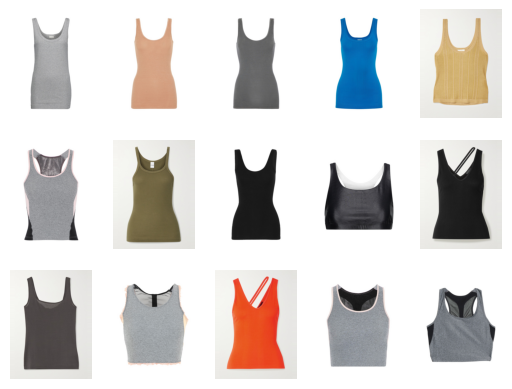

In [98]:
# 정렬된 인덱스를 사용하여 유사한 이미지 순서대로 접근
sorted_images_list = test_cluster_img_list[sorted_indices]

dataset_path = "C:/reClos/dataset/DressCode/cloth/upper_body/"
# 결과 사용, 예를 들어 가장 유사한 이미지부터 출력
for i in range(15):
    img = plt.imread(dataset_path + sorted_images_list[i])
    plt.subplot(3, 5, i+1)
    plt.axis('off')
    plt.imshow(img)

In [ ]:
############################################################################################################

### Grey Scale로 clustering하기 - Lower_Body

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [38]:
dataset_path = "C:/reClos/dataset/DressCode/cloth/lower_body/"

img_list = []
for img in os.listdir(dataset_path):
    if img.endswith("1.jpg"):
        img_list.append(img)

print(img_list)

['013563_1.jpg', '013564_1.jpg', '013565_1.jpg', '013566_1.jpg', '013567_1.jpg', '013568_1.jpg', '013569_1.jpg', '013570_1.jpg', '013571_1.jpg', '013572_1.jpg', '013573_1.jpg', '013574_1.jpg', '013575_1.jpg', '013576_1.jpg', '013577_1.jpg', '013578_1.jpg', '013579_1.jpg', '013580_1.jpg', '013581_1.jpg', '013582_1.jpg', '013583_1.jpg', '013584_1.jpg', '013585_1.jpg', '013586_1.jpg', '013587_1.jpg', '013588_1.jpg', '013589_1.jpg', '013590_1.jpg', '013591_1.jpg', '013592_1.jpg', '013593_1.jpg', '013594_1.jpg', '013595_1.jpg', '013596_1.jpg', '013597_1.jpg', '013598_1.jpg', '013599_1.jpg', '013600_1.jpg', '013601_1.jpg', '013602_1.jpg', '013603_1.jpg', '013604_1.jpg', '013605_1.jpg', '013606_1.jpg', '013607_1.jpg', '013608_1.jpg', '013609_1.jpg', '013610_1.jpg', '013611_1.jpg', '013612_1.jpg', '013613_1.jpg', '013614_1.jpg', '013615_1.jpg', '013616_1.jpg', '013617_1.jpg', '013618_1.jpg', '013619_1.jpg', '013620_1.jpg', '013621_1.jpg', '013622_1.jpg', '013623_1.jpg', '013624_1.jpg', '013625

In [39]:
print(len(img_list))

8951


In [40]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class CustomImageDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        self.images = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.directory, self.images[idx])
        # image = Image.open(img_name).convert('RGB')
        image = Image.open(img_name).convert('L') # load image grey scale
        if self.transform:
            image = self.transform(image)
        return image

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3), # convert to 3 channels
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = CustomImageDataset(directory=dataset_path, transform=transform)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

In [41]:
import torch
from torchvision.models import resnet50

# Initialize the pre-trained model
model = resnet50(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Adapt the model to use it as a feature extractor
model = torch.nn.Sequential(*(list(model.children())[:-1]))

if torch.cuda.is_available():
    device = torch.device("cuda")
    print('device: cuda')
else:
    device = torch.device("cpu")
    print('device: cpu')
model = model.to(device)

# Feature extraction function
def extract_features(dataloader, model, device):
    features = []
    with torch.no_grad():
        for inputs in dataloader:
            inputs = inputs.to(device)  # Move input data to the GPU
            outputs = model(inputs).flatten(start_dim=1)
            features.append(outputs.cpu().numpy())  # Move the tensors back to CPU for numpy conversion
    return np.concatenate(features, axis=0)

# Extract features
features_l = extract_features(dataloader, model, device)

c:\Users\reclos\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\reclos\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


device: cuda


In [42]:
features_l.shape

(8951, 2048)

In [43]:
#save model
np.save('./features_grey_lower.npy', features_l)

In [44]:
import numpy as np
# load model
features_l = np.load('./features_grey_lower.npy')

In [45]:
from sklearn.cluster import KMeans

# Clustering
kmeans_l = KMeans(n_clusters=100, random_state=22)
clusters_l = kmeans_l.fit_predict(features_l)

c:\Users\reclos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [46]:
print(len(clusters_l))
print(clusters_l)
print(len(set(clusters_l)))

8951
[50 22 24 ... 30 17 10]
100


In [47]:
cluster_groups_l = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
for i, cluster in enumerate(clusters_l):
    # print(i, cluster)
    if cluster not in cluster_groups_l:
        cluster_groups_l[cluster] = []
    
    cluster_groups_l[cluster].append(img_list[i])

In [48]:
def print_cluster_img(num):
    for i in range(15):
        img = plt.imread(dataset_path + cluster_groups_l[num][i])
        plt.subplot(3, 5, i+1)
        plt.axis('off')
        plt.imshow(img)

### Plot

In [ ]:
# for i in range(30):
#     plt.figure()
#     plt.axis('off')
#     plt.title(f'image cluster {i}')
#     print_cluster_img(i)

### Predict

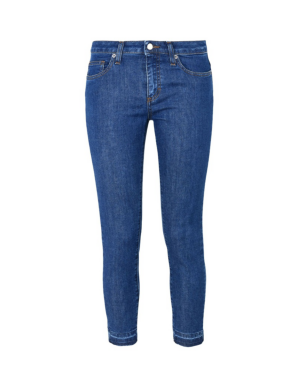

Test Image Cluster: [7]


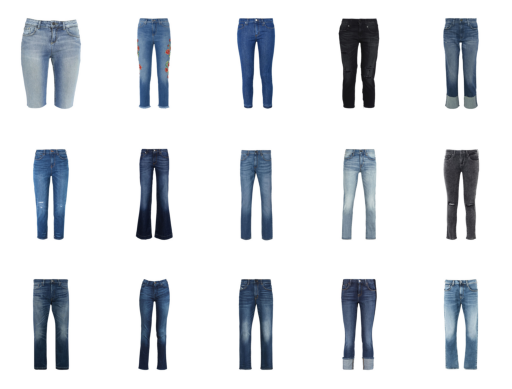

In [61]:
test_img = plt.imread('C:/reClos/dataset/DressCode/cloth/lower_body/013582_1.jpg')

test_img_transformed = transform(Image.fromarray(test_img))
test_img_feature = model(test_img_transformed.unsqueeze(0).to(device)).flatten(start_dim=1).detach().cpu().numpy()
# Plot the test image
plt.imshow(test_img)
plt.axis('off')
plt.show()

# Predict the cluster for the test image
test_cluster = kmeans_l.predict(test_img_feature) # predict the cluster number for the test image
print("Test Image Cluster:", test_cluster)

# Plot the images in the same cluster as the test image
print_cluster_img(test_cluster[0])


In [62]:
cluster_groups_l[test_cluster[0]]

['013566_1.jpg',
 '013581_1.jpg',
 '013582_1.jpg',
 '013586_1.jpg',
 '013605_1.jpg',
 '013615_1.jpg',
 '013643_1.jpg',
 '013649_1.jpg',
 '013675_1.jpg',
 '013681_1.jpg',
 '013699_1.jpg',
 '013704_1.jpg',
 '013717_1.jpg',
 '013737_1.jpg',
 '013747_1.jpg',
 '013751_1.jpg',
 '013767_1.jpg',
 '013772_1.jpg',
 '013793_1.jpg',
 '013809_1.jpg',
 '013813_1.jpg',
 '013814_1.jpg',
 '013826_1.jpg',
 '013839_1.jpg',
 '013861_1.jpg',
 '013868_1.jpg',
 '013872_1.jpg',
 '013879_1.jpg',
 '013881_1.jpg',
 '013888_1.jpg',
 '013902_1.jpg',
 '013904_1.jpg',
 '013916_1.jpg',
 '013917_1.jpg',
 '013932_1.jpg',
 '013934_1.jpg',
 '013935_1.jpg',
 '013937_1.jpg',
 '013939_1.jpg',
 '013945_1.jpg',
 '013949_1.jpg',
 '013952_1.jpg',
 '013954_1.jpg',
 '013970_1.jpg',
 '013974_1.jpg',
 '013976_1.jpg',
 '013979_1.jpg',
 '013980_1.jpg',
 '013982_1.jpg',
 '013983_1.jpg',
 '013984_1.jpg',
 '013985_1.jpg',
 '013990_1.jpg',
 '013992_1.jpg',
 '013995_1.jpg',
 '013996_1.jpg',
 '013997_1.jpg',
 '014003_1.jpg',
 '014017_1.jpg

In [63]:
# 예측 클러스터에 속하는 이미지들의 파일명을 저장하는 리스트 생성
test_cluster_img_list = cluster_groups_l[test_cluster[0]]

print("test image 클러스터에 속하는 이미지들의 파일명:", test_cluster_img_list)

test_cluster_img_idx_list = [i for i, j in enumerate(img_list) if j in test_cluster_img_list]
test_cluster_img_idx_list # idx list

test image 클러스터에 속하는 이미지들의 파일명: ['013566_1.jpg', '013581_1.jpg', '013582_1.jpg', '013586_1.jpg', '013605_1.jpg', '013615_1.jpg', '013643_1.jpg', '013649_1.jpg', '013675_1.jpg', '013681_1.jpg', '013699_1.jpg', '013704_1.jpg', '013717_1.jpg', '013737_1.jpg', '013747_1.jpg', '013751_1.jpg', '013767_1.jpg', '013772_1.jpg', '013793_1.jpg', '013809_1.jpg', '013813_1.jpg', '013814_1.jpg', '013826_1.jpg', '013839_1.jpg', '013861_1.jpg', '013868_1.jpg', '013872_1.jpg', '013879_1.jpg', '013881_1.jpg', '013888_1.jpg', '013902_1.jpg', '013904_1.jpg', '013916_1.jpg', '013917_1.jpg', '013932_1.jpg', '013934_1.jpg', '013935_1.jpg', '013937_1.jpg', '013939_1.jpg', '013945_1.jpg', '013949_1.jpg', '013952_1.jpg', '013954_1.jpg', '013970_1.jpg', '013974_1.jpg', '013976_1.jpg', '013979_1.jpg', '013980_1.jpg', '013982_1.jpg', '013983_1.jpg', '013984_1.jpg', '013985_1.jpg', '013990_1.jpg', '013992_1.jpg', '013995_1.jpg', '013996_1.jpg', '013997_1.jpg', '014003_1.jpg', '014017_1.jpg', '014020_1.jpg', '014025

[3,
 18,
 19,
 23,
 42,
 52,
 80,
 86,
 112,
 118,
 136,
 141,
 154,
 174,
 184,
 188,
 204,
 209,
 230,
 246,
 250,
 251,
 263,
 276,
 298,
 305,
 309,
 316,
 318,
 325,
 339,
 341,
 353,
 354,
 369,
 371,
 372,
 374,
 376,
 382,
 386,
 389,
 391,
 407,
 411,
 413,
 416,
 417,
 419,
 420,
 421,
 422,
 427,
 429,
 432,
 433,
 434,
 440,
 454,
 457,
 462,
 478,
 482,
 483,
 485,
 494,
 495,
 505,
 506,
 508,
 517,
 525,
 549,
 578,
 581,
 584,
 589,
 595,
 601,
 611,
 612,
 617,
 619,
 625,
 661,
 681,
 720,
 721,
 723,
 736,
 737,
 765,
 766,
 769,
 772,
 773,
 774,
 796,
 800,
 803,
 805,
 807,
 815,
 826,
 828,
 829,
 831,
 833,
 834,
 844,
 857,
 862,
 894,
 900,
 913,
 929,
 931,
 940,
 941,
 950,
 953,
 977,
 1103,
 1105,
 1113,
 1121,
 1126,
 1128,
 1131,
 1132,
 1134,
 1136,
 1139,
 1141,
 1142,
 1143,
 1149,
 1151,
 1154,
 1156,
 1157,
 1159,
 1165,
 5416,
 5417,
 5438,
 5451,
 5458,
 5459,
 5460,
 5461,
 5464,
 5477,
 5483,
 5498,
 5500,
 5502,
 5503,
 5517,
 5521,
 5533,
 556

In [64]:
### 유클리드 거리로 정렬

In [65]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

reference_feature = test_img_feature  # 기준 이미지의 특징 벡터
cluster_features = features_l[test_cluster_img_idx_list]    # test 클러스터 내 모든 이미지의 특징 벡터

# 유클리디안 거리 계산
distances = euclidean_distances(reference_feature, cluster_features)[0]
distances.shape

(218,)

In [66]:
# 거리에 따라 index 정렬
sorted_indices = np.argsort(distances)  # 오름차순으로 정렬
print(sorted_indices.shape)
sorted_indices

(218,)


array([  2,  33, 181,  42, 116,  75,  62, 217, 135, 196,  40,  87, 129,
       126,  18,  76,  61,  36, 154, 100, 148,  26, 166, 184, 206,  27,
       125, 186,  99, 161, 195, 199, 133, 150, 208,  48, 209,  86, 101,
        70, 198,  53,  50, 132, 107,  58, 189,  34, 149, 134, 136,  65,
        66,  46, 139,  11, 178, 146, 144,  39,  52, 131, 138, 140, 159,
        21,  35, 177,  38, 111,  16, 176,   5,  47,  78, 200, 160, 153,
        94, 215,   9, 122,  90, 187,  12,  54, 168,  31, 128,  20,  55,
       183, 204, 120,  64,  24, 118,  91,  14,  98,  72, 112,  44,  37,
        25, 152, 156, 123,   4,  93,  97,   8,  71,  17, 102,  13,  57,
        51,  81, 164, 163,  63,  32, 114, 147, 205, 115,  96, 203,  59,
       179,  45,  41, 103,   7, 185, 130, 117,  80, 207,  89, 182,  85,
        67,  84, 124, 158, 216, 143, 213, 165,  29, 191, 145,   1,  60,
       110,  49,  10,  82, 180, 197, 108,  30, 119,  79, 211,  77, 169,
        92, 214,  23,   3, 212,  68, 137, 109, 142, 106, 157,  9

In [67]:
test_cluster_img_list = np.array(test_cluster_img_list)
test_cluster_img_list[sorted_indices]  # 거리가 가장 가까운 순서대로 test cluster 내 이미지 정렬한 이미지 리스트

array(['013582_1.jpg', '013917_1.jpg', '050916_1.jpg', '013954_1.jpg',
       '014494_1.jpg', '014147_1.jpg', '014045_1.jpg', '051972_1.jpg',
       '014706_1.jpg', '051049_1.jpg', '013949_1.jpg', '014284_1.jpg',
       '014695_1.jpg', '014689_1.jpg', '013793_1.jpg', '014152_1.jpg',
       '014041_1.jpg', '013935_1.jpg', '019061_1.jpg', '014368_1.jpg',
       '019022_1.jpg', '013872_1.jpg', '019149_1.jpg', '050926_1.jpg',
       '051851_1.jpg', '013879_1.jpg', '014684_1.jpg', '050946_1.jpg',
       '014366_1.jpg', '019124_1.jpg', '051024_1.jpg', '051106_1.jpg',
       '014704_1.jpg', '019024_1.jpg', '051861_1.jpg', '013982_1.jpg',
       '051869_1.jpg', '014283_1.jpg', '014370_1.jpg', '014080_1.jpg',
       '051093_1.jpg', '013992_1.jpg', '013984_1.jpg', '014702_1.jpg',
       '014396_1.jpg', '014017_1.jpg', '050966_1.jpg', '013932_1.jpg',
       '019023_1.jpg', '014705_1.jpg', '014712_1.jpg', '014057_1.jpg',
       '014058_1.jpg', '013979_1.jpg', '014719_1.jpg', '013704_1.jpg',
      

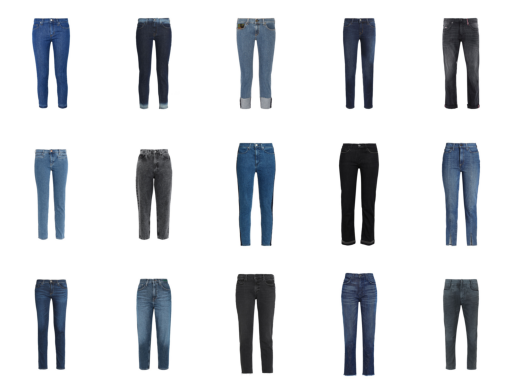

In [68]:
# 정렬된 인덱스를 사용하여 유사한 이미지 순서대로 접근
sorted_images_list = test_cluster_img_list[sorted_indices]

# 결과 사용, 예를 들어 가장 유사한 이미지부터 출력
for i in range(15):
    img = plt.imread(dataset_path + sorted_images_list[i])
    plt.subplot(3, 5, i+1)
    plt.axis('off')
    plt.imshow(img)